<a href="https://colab.research.google.com/github/mariagichomo/Fraud-detection/blob/main/Fraud_detection_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from matplotlib import pylab

# Load Data

In [342]:
client_df = pd.read_csv("drive/MyDrive/Data/train/client_train.csv")


In [343]:
client_df.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [344]:
invoice_df = pd.read_csv("drive/MyDrive/Data/train/invoice_train.csv",low_memory=False)

In [345]:
invoice_df.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


## Data Exploration

In [346]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [347]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [348]:
# check missing value
client_df.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [349]:
# check missing value
invoice_df.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [350]:
client_df.duplicated().values.any()

False

In [351]:
invoice_df.duplicated().values.any()

True

In [352]:
duplicates =invoice_df.duplicated()

In [353]:
# Count the number of duplicate rows
num_duplicates = duplicates.sum()

print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 11


In [354]:
duplicates_mask = invoice_df.duplicated(keep=False)

# Use the mask to filter and print the duplicated rows
duplicated_rows = invoice_df[duplicates_mask]
duplicated_rows

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
951890,train_Client_125864,2011-12-12,11,101545,5,413,6,1,0,0,0,0,13680,13680,2,ELEC
951893,train_Client_125864,2011-12-12,11,101545,5,413,6,1,0,0,0,0,13680,13680,2,ELEC
1755789,train_Client_25894,2010-07-13,40,6986740,5,5,6,1,0,0,0,0,0,0,2,GAZ
1755798,train_Client_25894,2010-07-13,40,6986740,5,5,6,1,0,0,0,0,0,0,2,GAZ
2137995,train_Client_3636,2012-01-18,40,312650,5,5,6,1,0,0,0,0,623,623,2,GAZ
2137999,train_Client_3636,2012-01-18,40,312650,5,5,6,1,0,0,0,0,623,623,2,GAZ
2163371,train_Client_37069,2010-10-11,11,5284,5,413,6,1,0,0,0,0,99429,99429,2,ELEC
2163374,train_Client_37069,2010-10-11,11,5284,5,413,6,1,0,0,0,0,99429,99429,2,ELEC
2433907,train_Client_44407,2008-02-28,11,66921,5,203,6,1,0,0,0,0,0,0,2,ELEC
2433919,train_Client_44407,2008-02-28,11,66921,5,203,6,1,0,0,0,0,0,0,2,ELEC


In [355]:

#drop duplicates
invoice_df.drop_duplicates(inplace=True)


In [356]:
# Count the number of duplicate rows
duplicates =invoice_df.duplicated()
num_duplicates = duplicates.sum()

print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


### Test Data

In [357]:
client_data = {
    'client_id': [1, 2, 3, 4],
    'client_name': ['Client A', 'Client B', 'Client C', 'Client D']
}

# Sample invoice data
invoice_data = {
    'client_id': [1, 2, 1, 3, 4],
    'invoice_number': [101, 102, 103, 104, 105],
    'amount': [500, 300, 700, 200, 900]
}

# Creating DataFrames from the sample data
client = pd.DataFrame(client_data)
invoice = pd.DataFrame(invoice_data)



In [358]:
client.head()

,client_id,client_name
0,1,Client A
1,2,Client B
2,3,Client C
3,4,Client D


In [359]:
invoice

,client_id,invoice_number,amount
0,1,101,500
1,2,102,300
2,1,103,700
3,3,104,200
4,4,105,900


In [360]:
# Merging the two datasets based on 'client_id'
merged_df = pd.merge(client, invoice, on='client_id', how='left')

In [361]:
merged_df

,client_id,client_name,invoice_number,amount
0,1,Client A,101,500
1,1,Client A,103,700
2,2,Client B,102,300
3,3,Client C,104,200
4,4,Client D,105,900


In [362]:
grouped_df = merged_df.groupby('client_id').agg({
    'client_name': 'first',
    'invoice_number': 'size',
    'amount': 'sum'
}).reset_index()


In [363]:
grouped_df

,client_id,client_name,invoice_number,amount
0,1,Client A,2,1200
1,2,Client B,1,300
2,3,Client C,1,200
3,4,Client D,1,900


## End of Test Data

## Merge our Dataset

In [364]:
df2 = pd.merge(client_df, invoice_df, on='client_id', how='left')

In [365]:
df2

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476733,60,train_Client_99998,11,101,22/12/1993,0.0,2005-08-19,10,1253571,0,...,9,1,400,135,0,0,3197,3732,8,ELEC
4476734,60,train_Client_99998,11,101,22/12/1993,0.0,2005-12-19,10,1253571,0,...,6,1,200,6,0,0,3732,3938,4,ELEC
4476735,60,train_Client_99999,11,101,18/02/1986,0.0,1996-09-25,11,560948,0,...,6,1,259,0,0,0,13884,14143,4,ELEC
4476736,60,train_Client_99999,11,101,18/02/1986,0.0,1996-05-28,11,560948,0,...,6,1,603,0,0,0,13281,13884,4,ELEC


In [366]:
df2.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [367]:
df2.rename(columns ={'disrict':'district'},inplace = True )

In [368]:
df2.dtypes

district                  int64
client_id                object
client_catg               int64
region                    int64
creation_date            object
target                  float64
invoice_date             object
tarif_type                int64
counter_number            int64
counter_statue           object
counter_code              int64
reading_remarque          int64
counter_coefficient       int64
consommation_level_1      int64
consommation_level_2      int64
consommation_level_3      int64
consommation_level_4      int64
old_index                 int64
new_index                 int64
months_number             int64
counter_type             object
dtype: object

In [369]:
df2['target'] = df2['target'].astype(int)

In [370]:
df2['counter_type'].value_counts()

ELEC    3079398
GAZ     1397340
Name: counter_type, dtype: int64

In [371]:
df2['creation_date']= df2['creation_date'].astype('datetime64[ns]')

<ipython-input-371-1a8b9bd01d86>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [372]:
df2['invoice_date'] = df2['invoice_date'].astype('datetime64[ns]')

In [373]:
df2

,district,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,1994-12-31,0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,1994-12-31,0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,1994-12-31,0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,1994-12-31,0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,1994-12-31,0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476733,60,train_Client_99998,11,101,1993-12-22,0,2005-08-19,10,1253571,0,...,9,1,400,135,0,0,3197,3732,8,ELEC
4476734,60,train_Client_99998,11,101,1993-12-22,0,2005-12-19,10,1253571,0,...,6,1,200,6,0,0,3732,3938,4,ELEC
4476735,60,train_Client_99999,11,101,1986-02-18,0,1996-09-25,11,560948,0,...,6,1,259,0,0,0,13884,14143,4,ELEC
4476736,60,train_Client_99999,11,101,1986-02-18,0,1996-05-28,11,560948,0,...,6,1,603,0,0,0,13281,13884,4,ELEC


In [374]:
grouped_df2 = df2.groupby('client_id').agg({
    'district': 'first',
    'client_catg':'first',
    'region':'first',
    'creation_date':'first',
    'invoice_date':'size',
    'tarif_type': 'first',
    'counter_number': 'first',
    'counter_statue': 'first',
    'consommation_level_1':'sum',
    'consommation_level_2': 'sum',
    'consommation_level_3':'sum',
    'consommation_level_4':'sum',
    'target':'first',
    'months_number':'sum',
    'counter_type': 'first',
}).reset_index()

In [375]:
grouped_df2

,client_id,district,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,target,months_number,counter_type
0,train_Client_0,60,11,101,1994-12-31,35,11,1335667,0,12334,370,0,0,0,162,ELEC
1,train_Client_1,69,11,107,2002-05-29,37,11,678902,0,20629,0,0,0,0,160,ELEC
2,train_Client_10,62,11,301,1986-03-13,18,11,572765,0,14375,682,0,0,0,116,ELEC
3,train_Client_100,69,11,105,1996-11-07,20,11,2078,0,24,0,0,0,0,84,ELEC
4,train_Client_1000,62,11,303,2014-10-14,14,11,19575,0,9292,1468,1643,514,0,52,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,train_Client_99995,62,11,304,2004-07-26,71,11,897286,0,139,0,0,0,0,300,ELEC
135489,train_Client_99996,63,11,311,2012-10-25,41,11,398783,0,7620,31,0,0,0,160,ELEC
135490,train_Client_99997,63,11,311,2011-11-22,36,11,262195,0,9831,0,0,0,0,148,ELEC
135491,train_Client_99998,60,11,101,1993-12-22,2,10,1253571,0,600,141,0,0,0,12,ELEC


In [376]:
grouped_df2['Total_Consommation'] = grouped_df2['consommation_level_1'] + grouped_df2['consommation_level_2'] + grouped_df2['consommation_level_3'] + grouped_df2 ['consommation_level_4']

In [377]:
grouped_df2

,client_id,district,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,target,months_number,counter_type,Total_Consommation
0,train_Client_0,60,11,101,1994-12-31,35,11,1335667,0,12334,370,0,0,0,162,ELEC,12704
1,train_Client_1,69,11,107,2002-05-29,37,11,678902,0,20629,0,0,0,0,160,ELEC,20629
2,train_Client_10,62,11,301,1986-03-13,18,11,572765,0,14375,682,0,0,0,116,ELEC,15057
3,train_Client_100,69,11,105,1996-11-07,20,11,2078,0,24,0,0,0,0,84,ELEC,24
4,train_Client_1000,62,11,303,2014-10-14,14,11,19575,0,9292,1468,1643,514,0,52,ELEC,12917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,train_Client_99995,62,11,304,2004-07-26,71,11,897286,0,139,0,0,0,0,300,ELEC,139
135489,train_Client_99996,63,11,311,2012-10-25,41,11,398783,0,7620,31,0,0,0,160,ELEC,7651
135490,train_Client_99997,63,11,311,2011-11-22,36,11,262195,0,9831,0,0,0,0,148,ELEC,9831
135491,train_Client_99998,60,11,101,1993-12-22,2,10,1253571,0,600,141,0,0,0,12,ELEC,741


In [378]:
grouped_df2.rename(columns ={'invoice_date':'invoice_count'},inplace = True )

In [379]:
grouped_df2['client_id'] = grouped_df2['client_id'].str.replace('train_Client_', '')

In [380]:
# DATA VISUALIZATION

In [381]:
grouped_df2

,client_id,district,client_catg,region,creation_date,invoice_count,tarif_type,counter_number,counter_statue,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,target,months_number,counter_type,Total_Consommation
0,0,60,11,101,1994-12-31,35,11,1335667,0,12334,370,0,0,0,162,ELEC,12704
1,1,69,11,107,2002-05-29,37,11,678902,0,20629,0,0,0,0,160,ELEC,20629
2,10,62,11,301,1986-03-13,18,11,572765,0,14375,682,0,0,0,116,ELEC,15057
3,100,69,11,105,1996-11-07,20,11,2078,0,24,0,0,0,0,84,ELEC,24
4,1000,62,11,303,2014-10-14,14,11,19575,0,9292,1468,1643,514,0,52,ELEC,12917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,99995,62,11,304,2004-07-26,71,11,897286,0,139,0,0,0,0,300,ELEC,139
135489,99996,63,11,311,2012-10-25,41,11,398783,0,7620,31,0,0,0,160,ELEC,7651
135490,99997,63,11,311,2011-11-22,36,11,262195,0,9831,0,0,0,0,148,ELEC,9831
135491,99998,60,11,101,1993-12-22,2,10,1253571,0,600,141,0,0,0,12,ELEC,741


In [382]:
grouped_df2['creation_date'].max()

Timestamp('2019-12-07 00:00:00')

In [383]:
grouped_df2['creation_date'].min()

Timestamp('1977-01-03 00:00:00')

In [384]:
#Creation Date represents the date client joined
#Instead of using the dates, the grouping will be done per year
numberofclientsjoinedper_year = grouped_df2.groupby(grouped_df2.creation_date.dt.year)['client_id'].count()

In [385]:
numberofclientsjoinedper_year


creation_date
1977    1658
1978    1510
1979    1724
1980    1850
1981    1843
1982    1685
1983    2272
1984    1918
1985    2225
1986    2063
1987    1995
1988    2268
1989    2290
1990    2214
1991    2182
1992    1966
1993    2195
1994    2685
1995    2705
1996    2297
1997    2561
1998    2591
1999    2715
2000    3783
2001    2578
2002    4406
2003    3206
2004    2926
2005    2590
2006    3482
2007    5265
2008    5672
2009    5644
2010    6275
2011    5492
2012    5148
2013    5291
2014    5230
2015    4731
2016    4869
2017    4420
2018    3973
2019    1100
Name: client_id, dtype: int64

Text(0, 0.5, 'Number of Clients')

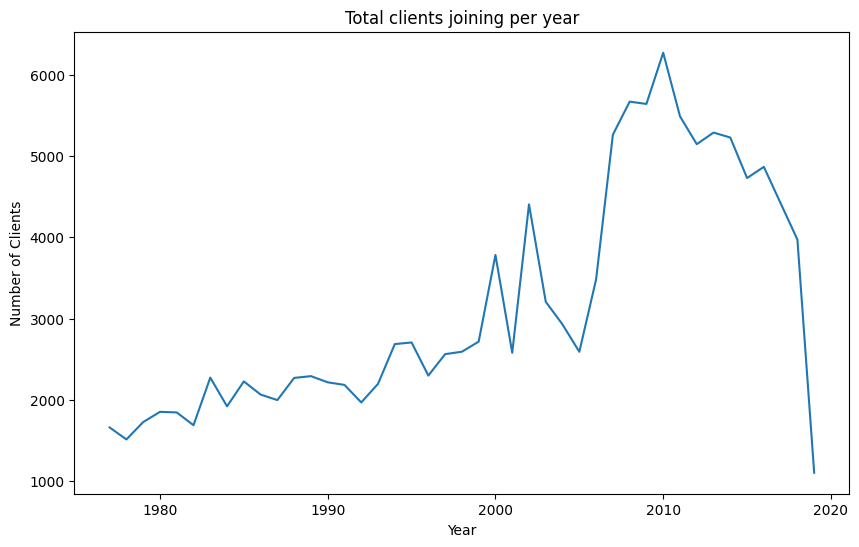

In [386]:
# Visualizing a plot of the number of clients who joined in each year
#The aim of this visual is to see which year had the most number of clients joining and which year had less clients joining.

numberofclientsjoinedper_year.plot()

plt.title('Total clients joining per year')
plt.xlabel('Year')
plt.ylabel ('Number of Clients')

In [415]:
#From the above plot we see that we had more clients joining in the year 2010.
#As they approched 2019, the number of clients joining decreased
# A total of 6275 clients joined in 2010, which was the highest record
# 2019 had the lowest record of 1100 which shows that few clients joined.

In [388]:
grouped_df2.set_index(['creation_date'], inplace = True)
# Create a column that has the year of each date that the client joined
grouped_df2["year"] = grouped_df2.index.year

In [407]:
grouped_df2.head(5)

,client_id,district,client_catg,region,invoice_count,tarif_type,counter_number,counter_statue,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,target,months_number,counter_type,Total_Consommation,year
creation_date,,,,,,,,,,,,,,,,,
1994-12-31,0,60,11,101,35,11,1335667,0,12334,370,0,0,0,162,ELEC,12704,1994
2002-05-29,1,69,11,107,37,11,678902,0,20629,0,0,0,0,160,ELEC,20629,2002
1986-03-13,10,62,11,301,18,11,572765,0,14375,682,0,0,0,116,ELEC,15057,1986
1996-11-07,100,69,11,105,20,11,2078,0,24,0,0,0,0,84,ELEC,24,1996
2014-10-14,1000,62,11,303,14,11,19575,0,9292,1468,1643,514,0,52,ELEC,12917,2014


In [408]:
grouped_df2_pivot = pd.pivot_table(
    grouped_df2,
    values = "client_id",
    index="year",
    columns ="counter_type",
    aggfunc = "count"
)


In [410]:
grouped_df2_pivot

counter_type,ELEC,GAZ
year,,
1977,1431,227
1978,1276,234
1979,1437,287
1980,1553,297
1981,1516,327
1982,1382,303
1983,1862,410
1984,1571,347
1985,1829,396


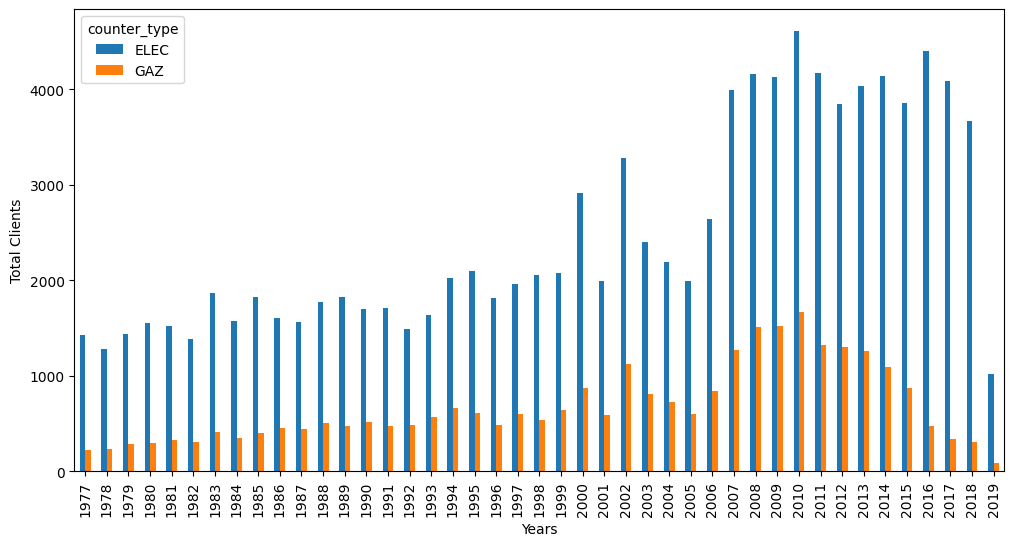

In [390]:
#Plot a bar chart using the grouped_df2
ax = grouped_df2_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(12, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Total Clients")


plt.show()

In [413]:
#Above is a grouped bar chart which shows the total number of clients in each category type.
#The category type is either ELEC or GAZ, which present Electricity and Gas consumption.
#Blue represents Electricity and Orange represents Gas.
#The x-axis which is the 'Years' represents the year which the client joined.
#The y-axis which is 'Total Clients' represents the total number of clients who joined per year.
#The results of the grouped bar chart shows that most clients who joined in each year were electricity consumers and a few were gas consumers.

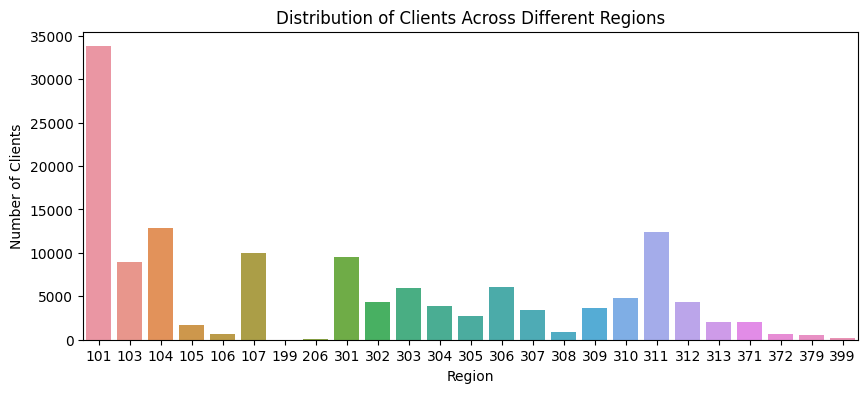

In [425]:
#Distribution of clients across different regions
plt.figure(figsize=(10,4))
sns.countplot(x='region', data= grouped_df2)
plt.title('Distribution of Clients Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Clients')
plt.show()

In [420]:
#The bar chart above shows distribution of clients in each region.
#Region 101 has the most number of clients.
#Region 199 has the least number of clients.


In [417]:
grouped_df2['region'].value_counts()

101    33770
104    12865
311    12406
107     9998
301     9544
103     8964
306     6044
303     5982
310     4851
312     4379
302     4311
304     3828
309     3669
307     3376
305     2716
313     2076
371     2065
105     1645
308      841
106      706
372      644
379      583
399      175
206       53
199        2
Name: region, dtype: int64

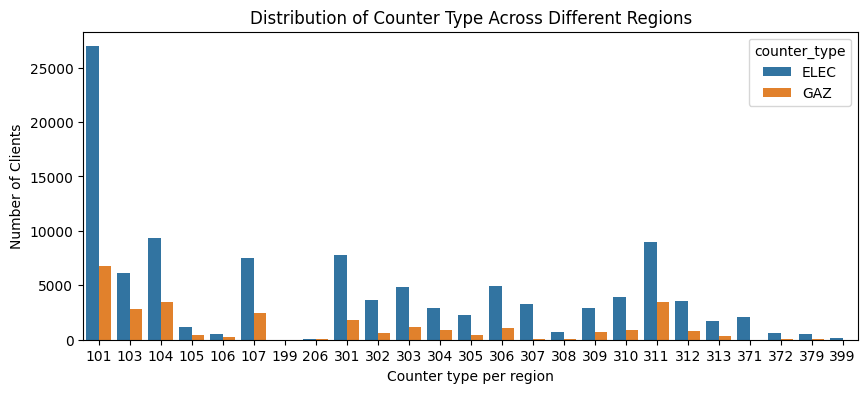

In [428]:
#Distribution of clients across different regions
plt.figure(figsize=(10,4))
sns.countplot(x='region', hue='counter_type',data= grouped_df2)
plt.title('Distribution of Counter Type Across Different Regions')
plt.xlabel('Counter type per region')
plt.ylabel('Number of Clients')
plt.show()

In [394]:
grouped_df2.describe()

,district,client_catg,region,invoice_count,tarif_type,counter_number,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,target,months_number,Total_Consommation,year
count,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,1.354930e+05,1.354930e+05,1.354930e+05,135493.000000,1.354930e+05,135493.000000,1.354930e+05,1.354930e+05,135493.000000
mean,63.511222,11.512506,206.159809,33.040364,17.179264,6.935480e+11,1.357895e+04,3.612063e+03,670.926011,1.748695e+03,0.055841,1.481234e+03,1.961063e+04,2002.183552
std,3.354400,4.423761,104.207044,26.092089,11.916593,3.928191e+12,1.730569e+04,2.297694e+04,2959.859852,1.825613e+04,0.229614,1.426559e+05,4.383816e+04,11.565963
min,60.000000,11.000000,101.000000,1.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,1977.000000
25%,62.000000,11.000000,103.000000,10.000000,11.000000,1.397510e+05,3.048000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,4.800000e+01,3.525000e+03,1994.000000
50%,62.000000,11.000000,107.000000,30.000000,11.000000,5.268610e+05,1.031200e+04,1.710000e+02,0.000000,0.000000e+00,0.000000,1.330000e+02,1.209100e+04,2005.000000
75%,69.000000,11.000000,307.000000,50.000000,11.000000,1.201665e+06,1.974500e+04,1.763000e+03,152.000000,0.000000e+00,0.000000,2.140000e+02,2.324700e+04,2012.000000
max,69.000000,51.000000,399.000000,439.000000,45.000000,2.739110e+13,1.290954e+06,2.245578e+06,463655.000000,2.850472e+06,1.000000,2.626528e+07,3.434526e+06,2019.000000


In [395]:
#Find the presence of outliers using a histogram
#Check for presence of outliers in total consommation
#Create a box plot
fig1 = px.box(grouped_df2, y='Total_Consommation')
fig1.show()

In [396]:
grouped_df2.describe()[['invoice_count','Total_Consommation']]

,invoice_count,Total_Consommation
count,135493.000000,1.354930e+05
mean,33.040364,1.961063e+04
std,26.092089,4.383816e+04
min,1.000000,0.000000e+00
25%,10.000000,3.525000e+03
50%,30.000000,1.209100e+04
75%,50.000000,2.324700e+04
max,439.000000,3.434526e+06


In [397]:
fig = px.scatter(x=grouped_df2['Total_Consommation'], y=grouped_df2['invoice_count'])

# Add labels
fig.update_layout(
    xaxis_title='Total Consommation',
    yaxis_title='Invoice Count',
    title='Scatter Plot of Total Consommation vs. Invoice Count'
)
fig.show()

In [398]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers=df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]

  return outliers

In [399]:
outliers = find_outliers_IQR(grouped_df2['Total_Consommation'])

In [400]:
print('number of outliers:'+str(len(outliers)))

number of outliers:7285


In [401]:
print('max outlier value: '+str(outliers.max()))

max outlier value: 3434526


In [402]:
print('min outlier value: '+str(outliers.min()))

min outlier value: 52836


In [403]:
outliers

creation_date
1983-07-11     62216
1995-07-24     53841
1985-03-22     62402
1991-11-26     92246
1994-08-06    139807
               ...  
2011-11-04     75011
1983-10-01     56805
1992-03-12     71626
1990-07-05     53467
1994-12-31    369579
Name: Total_Consommation, Length: 7285, dtype: int64

In [404]:
grouped_df2['target'].value_counts()

0    127927
1      7566
Name: target, dtype: int64

Text(0.5, 1.0, 'Distribution of Classes')

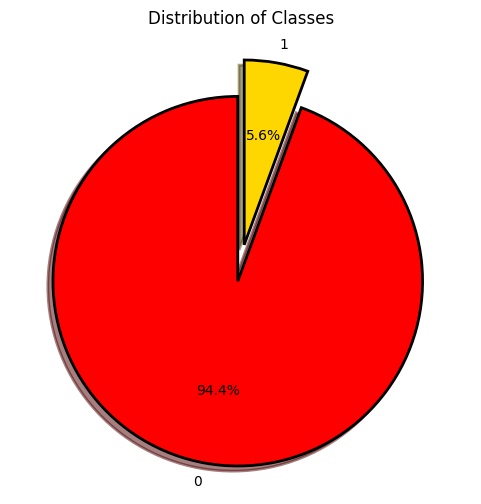

In [405]:
fig = plt.figure(figsize=(6,6))
colors = ("red", "gold")
wp = {'linewidth':2,'edgecolor':"black"}
tags = grouped_df2['target'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors = colors, startangle =90,
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of Classes')